In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 33)

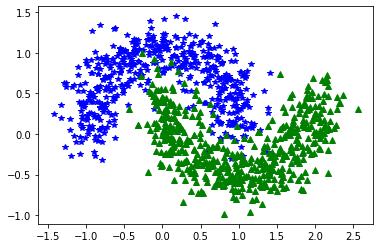

In [3]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

In [4]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)

# voting_clf.fit(X, y)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [7]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.875
RandomForestClassifier 0.965
SVC 0.975
VotingClassifier 0.9725


In [8]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rnd', rnd_clf), ('svm', svm_clf)],
    voting = 'soft',
)

# voting_clf.fit(X_train, y_train)

In [9]:
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.875
RandomForestClassifier 0.9675
SVC 0.975
VotingClassifier 0.965


In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True, n_jobs = -1
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [12]:
y_pred = bag_clf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.9625

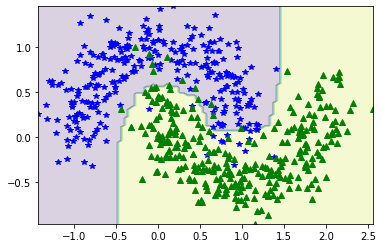

In [14]:
x0, x1 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = bag_clf.predict(X_new).reshape(x0.shape)
y_prob = bag_clf.predict_proba(X_new)[:, 0].reshape(x0.shape)

plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'b*')
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'g^')

plt.contourf(x0, x1, y_pred, alpha = 0.2)

In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    bootstrap = True, n_jobs = -1, oob_score = True
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [16]:
bag_clf.oob_score_

0.9466666666666667

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9675

In [19]:
bag_clf.oob_decision_function_

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.99462366, 0.00537634],
       [0.        , 1.        ],
       [0.54054054, 0.45945946]])

### Random Patches method

bug_clf = BaggingClassifier(bootstrap = False, max_samples = 1.0, bootstrap_features = True, max_features = 0.9)
                           
### Random Subspaces method

bug_clf = BaggingClassifier(bootstrap_features = True, max_features = 0.9)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16,
                                n_jobs = -1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [22]:
rnd_clf.score(X_test, y_test)

0.965

In [23]:
y_pred = rnd_clf.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.965

<h6>The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best featrue among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following BaggingClassifier is roughly equivalent to the previous RandomForestClassifier:</h6>

<i>bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = 'random', max_leaf_nodes = 16),
    n_estimators = 500, max_samples = 1.0, bootstrap = True, n_jobs = -1
)</i>

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
params = {'n_estimators': 500, 'max_depth': 20, 'max_leaf_nodes': 20,
         'n_jobs': -1}

In [49]:
extra_clf = ExtraTreesClassifier(**params)
forest_clf = RandomForestClassifier(**params)

extra_clf.fit(X_train, y_train)
forest_clf.fit(X_train, y_train)

print(extra_clf.score(X_test, y_test))
print(extra_clf.score(X_test, y_test))

0.965
0.965


In [51]:
forest_clf.feature_importances_

array([0.47827386, 0.52172614])

In [53]:
extra_clf.feature_importances_

array([0.43638012, 0.56361988])

In [54]:
from sklearn.datasets import load_iris

In [59]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [56]:
params = {'max_depth': 7, 'max_leaf_nodes': 8, 'n_jobs': -1,
         'n_estimators': 30}

In [61]:
forest_clf = RandomForestClassifier(**params)
extra_clf = ExtraTreesClassifier(**params)

forest_clf.fit(X_train, y_train)
extra_clf.fit(X_train, y_train)

print(forest_clf.score(X_test, y_test))
print(extra_clf.score(X_test, y_test))

0.9333333333333333
0.9333333333333333


In [66]:
for clf in [forest_clf, extra_clf]:
    print(clf.__class__.__name__)
    for name, importance in zip(iris.feature_names, clf.feature_importances_):
        print(name, ':', importance)
    print()

RandomForestClassifier
sepal length (cm) : 0.045868086142408206
sepal width (cm) : 0.042319893634978505
petal length (cm) : 0.4611357760289035
petal width (cm) : 0.45067624419370983

ExtraTreesClassifier
sepal length (cm) : 0.0821972889572212
sepal width (cm) : 0.04081882661588334
petal length (cm) : 0.4148605225828562
petal width (cm) : 0.46212336184403924



In [68]:
from sklearn.datasets import load_digits

In [69]:
digit = load_digits()

In [70]:
X = digit.data
y = digit.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

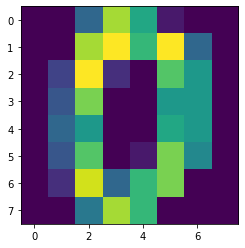

In [71]:
plt.imshow(X[0].reshape(8, 8))

In [77]:
forest_clf = RandomForestClassifier(n_estimators = 20, max_features = 50,
                                   max_leaf_nodes = 30, max_depth = 20)
forest_clf.fit(X_train, y_train)

forest_clf.score(X_test, y_test)

0.9148148148148149

In [78]:
feat_imp = forest_clf.feature_importances_

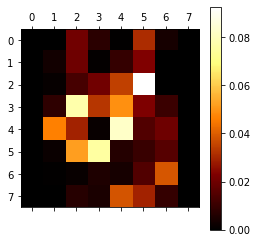

In [101]:
plt.matshow(feat_imp.reshape(8, 8), cmap = plt.get_cmap('afmhot'))
plt.colorbar()